## OKC - Effects of Bullying

This analysis seeks to build upon the study "Impact of Bullying in Childhood on Adult Health, Wealth, Crime and Social Outcomes" (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4090076/), which claims that bullying causes results in a "increased risk of poor health, wealth and social relationship outcomes in adulthood."

Our data set consists of individuals who answered q38555:
- How often were you picked on by other kids your age when you were growing up (Very often, Sometimes, Rarely, Never)

We will segment individuals based on their answer to see how else they were affected. Also, we will briefly explore any interesting trends that we come across.


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline
#display floats with sci notation
#pd.options.display.float_format = '{:40,.4f}'.format

In [5]:
okc_df = pd.read_csv('okc_bullied.txt', sep='\t', low_memory=False)
okc_df.shape

(12527, 2625)

(-1.1050038013334962,
 1.100238276253976,
 -1.1150998817569091,
 1.1100890449549958)

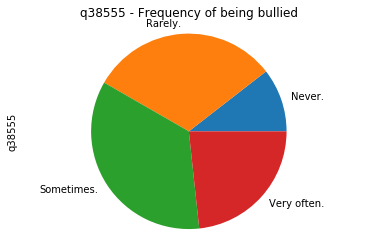

In [6]:
#sort_index conveniently sorts the pie graph so rarely and never are next to eachother.
okc_df['q38555'].value_counts().sort_index().plot.pie()
plt.title('q38555 - Frequency of being bullied')
plt.axis('equal')

Our distribution shows that the vast majority of the OKC user sample has been bullied at some point during the childhood. Additionally, the majority of the users were bullied occasionally (sometimes) and frequently (very often). 

It is worth noting that the line between rarely, sometimes, and very often may be subjective, as each individual may interpret their frequency of being bullied differently.

Next, we will see if there is any correlation between childhood bullying and adult happiness.
q4018 - Are you happy with your life?

In [7]:
happy_corr = pd.get_dummies(okc_df, columns=['q38555','q4018'])[['q38555_Never.','q38555_Rarely.','q38555_Sometimes.','q38555_Very often.','q4018_No','q4018_Yes']].corr()
happy_corr[['q4018_No','q4018_Yes']].head(4)


,q4018_No,q4018_Yes
q38555_Never.,-0.049170,0.054878
q38555_Rarely.,-0.063474,0.076911
q38555_Sometimes.,0.001346,-0.010102
q38555_Very often.,0.103701,-0.112686


There seems to be a very weak correlation between current happiness and frequency of childhood bullying in this data set.

How about hard drugs?  
q80 -	What's your deal with harder drugs (stuff beyond pot)?

In [8]:
drug_corr = pd.get_dummies(okc_df, columns=['q38555','q80'])[['q38555_Never.','q38555_Rarely.','q38555_Sometimes.','q38555_Very often.','q80_I never do drugs.',"q80_I've done drugs in the past, but no longer.",'q80_I do drugs occasionally.','q80_I do drugs regularly.']].corr()
drug_corr[['q80_I never do drugs.',"q80_I've done drugs in the past, but no longer.",'q80_I do drugs occasionally.','q80_I do drugs regularly.']].head(4)


,q80_I never do drugs.,"q80_I've done drugs in the past, but no longer.",q80_I do drugs occasionally.,q80_I do drugs regularly.
q38555_Never.,0.006937,-0.002426,-0.023794,0.004772
q38555_Rarely.,0.000721,0.014537,-0.021749,-0.015202
q38555_Sometimes.,-0.019223,0.011757,0.014314,-0.003961
q38555_Very often.,0.015867,-0.027435,0.024941,0.017667


In [76]:
okc_df['q77'].value_counts(normalize=True)

Sometimes     0.558163
Rarely        0.250991
Never         0.098976
Very often    0.091870
Name: q77, dtype: float64

Based off of the above, there does not seem to be a significant correlation between childhood bullying and hard drug use. 

Interestingly, about 70% of the OKC user base claimed to have never done drugs. 7% of the users do drugs occasionally and .3% do drugs regularly. This is in line with the Substance Abuse and Mental Health Services Administration's claim that "9.4 percent of the population—had used an illicit drug in the past month."(https://www.drugabuse.gov/publications/drugfacts/nationwide-trends)

It is possilbe that the usage rate is lower on OKC (7.3% vs 9.4%) because people do not want to admit on a public site that they do illegal hard drugs.

Next, we will see if childhood bullying has any impact on cognitive abilities. This will be a number computed by grading a user's repsonse to a number of questions with an absolute right or wrong answer. These questions will be attached in the appendix. The cognitive ability index is inspired by Kirkegaard's analysis on the same data set (https://openpsych.net/files/papers/Kirkegaard_2016g.pdf)



In [51]:
cog_df = pd.read_csv('cog_text.txt', sep='\t', low_memory=False)
cog_df.shape

(14, 8)

In [71]:
def getCogIndx(row):
    
    cog_index = None
    answered_questions = 0
    total_score = 0 #perhaps introduce question and answer weights
    
    for index, question in cog_df.iterrows():
        column = question['Column']
        correct_answer = question["option_"+str(question['option_correct'])]
        
        user_answer = row[column]
        
        if(user_answer is np.nan):
            pass #user did not answer question
        else:
            answered_questions += 1
            if(user_answer == correct_answer):
                total_score +=1
                
    if(answered_questions > 0):
        cog_index = total_score / answered_questions
    #else:
     #   print('no questions answered')

    return cog_index 

In [72]:
okc_df['cog_indx'] = okc_df.apply(getCogIndx, axis=1)

In [70]:
okc_df['cog_indx'].describe()

count    12527.000000
mean         0.550544
std          0.183808
min          0.000000
25%          0.428571
50%          0.571429
75%          0.700000
max          0.857143
Name: cog_indx, dtype: float64

In [110]:
#normalize data to 0-1 range
norm_cog_indx = preprocessing.normalize(okc_df['cog_indx'], axis=0).ravel()

E:\Users\FBI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [111]:
norm_cog_indx

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [112]:
norm_cog_indx.shape

(12527,)

In [107]:
okc_df.shape

(12527, 2627)

In [113]:
okc_df['cog_indx_norm'] = norm_cog_indx

In [114]:
okc_df['cog_indx_norm'].describe()

count    12527.000000
mean         0.985791
std          0.118358
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: cog_indx_norm, dtype: float64

There are definitely issues with this method of cognitive measurement. This method assumes that all questions equally determine one's cognitive ability. Additionally, users would possibly be able to copy and paste the question into a search engine and easily get the answer. Surprisingly, nobody in this data set had a perfect score (1), even with that possibility. 

In [79]:
drug_cog_corr = pd.get_dummies(okc_df, columns=['q80'])[['q80_I never do drugs.',"q80_I've done drugs in the past, but no longer.",'q80_I do drugs occasionally.','q80_I do drugs regularly.','cog_indx']].corr()
drug_cog_corr['cog_indx'].head(4)

q80_I never do drugs.                              0.048446
q80_I've done drugs in the past, but no longer.   -0.015585
q80_I do drugs occasionally.                       0.015569
q80_I do drugs regularly.                          0.001153
Name: cog_indx, dtype: float64

Drug use does not seem to have a major impact on their cognitive index, though it may be worth noting that those who have never done drugs have the highest positive correlation (.048) with our index.

Next, we'll try to reproduce the findings of Kirkegaard, who claims that "We see a linear negative relationship between the
rated importance of religion/God in life and cognitive ability"

In [82]:
drug_cog_corr = pd.get_dummies(okc_df, columns=['q41'])[['q41_Not at all important','q41_Not very important','q41_Somewhat important','q41_Extremely important','cog_indx']].corr()
drug_cog_corr['cog_indx'].head(4)

q41_Not at all important    0.203874
q41_Not very important     -0.003465
q41_Somewhat important     -0.138635
q41_Extremely important    -0.091800
Name: cog_indx, dtype: float64

In [80]:
okc_df['q41'].value_counts(normalize=True)

Not at all important    0.486817
Not very important      0.225401
Somewhat important      0.205772
Extremely important     0.082009
Name: q41, dtype: float64

### Appendix

In [67]:
#cognitive questions
cog_df.head(14)

,Column,ID,text,option_1,option_2,option_3,option_4,option_correct
0,q178,178,Which is bigger?,The earth,The sun,NaN,NaN,2
1,q255,255,STALE is to STEAL as 89475 is to...,89457,98547,89754,89547,4
2,q1201,1201,"What is next in this series? 1, 4, 10, 19, 31, _",36,48,46,Don't know / don't care,3
3,q14835,14835,"If you turn a left-handed glove inside out, it...",On my left hand,On my right hand,NaN,NaN,2
4,q8672,8672,In the line 'Wherefore art thou Romeo?' what d...,Why,Where,How,Who cares / wtf?,1
5,q18154,18154,How many fortnights are in a year?,52,14,26,365,3
6,q12625,12625,Half of all policemen are thieves and half of ...,Yes,No,NaN,NaN,2
7,q477,477,Which is longer?,A mile,A kilometer,I don't know!,NaN,1
8,q256,256,When birds stand on power lines and don't get ...,"Good timing, they only land between calls",Body materials that are insulated from current,Not touching anything else at the same time,"They do get hurt, they just express it poorly",3
9,q43639,43639,Etymology is...,The study of culinary arts.,The study of insects.,The study of the origins of words.,I don't know.,3
